In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [96]:
continous= pd.read_csv('continous.csv')[1:]

In [97]:
continous.head()

,Sales,Advertising,deltaa,profit
1,17.070420,17.502916,0.944768,3370.834329
2,20.554324,19.471040,0.112445,4219.193203
3,22.559129,19.647133,0.009044,4803.025346
4,23.684551,19.713817,0.003394,5133.983656
5,24.311545,19.719574,0.000292,5321.506014


In [99]:
continous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 1 to 35
Data columns (total 4 columns):
Sales          35 non-null float64
Advertising    35 non-null float64
deltaa         35 non-null float64
profit         35 non-null float64
dtypes: float64(4)
memory usage: 1.2 KB


In [100]:
continous.describe()

,Sales,Advertising,deltaa,profit
count,35.000000,35.000000,35.000000,35.000000
mean,24.409305,19.009933,0.010738,5421.798281
std,1.634000,2.135366,0.176928,447.726059
min,17.070420,8.878761,-0.354486,3370.834329
25%,24.701843,19.598134,-0.001427,5537.786125
50%,25.080854,19.740819,-0.000112,5555.949732
75%,25.109330,19.778578,0.000313,5558.078009
max,25.119914,19.803305,0.944768,5711.706867


In [101]:
continous.columns

Index([u'Sales', u'Advertising', u'deltaa', u'profit'], dtype='object')

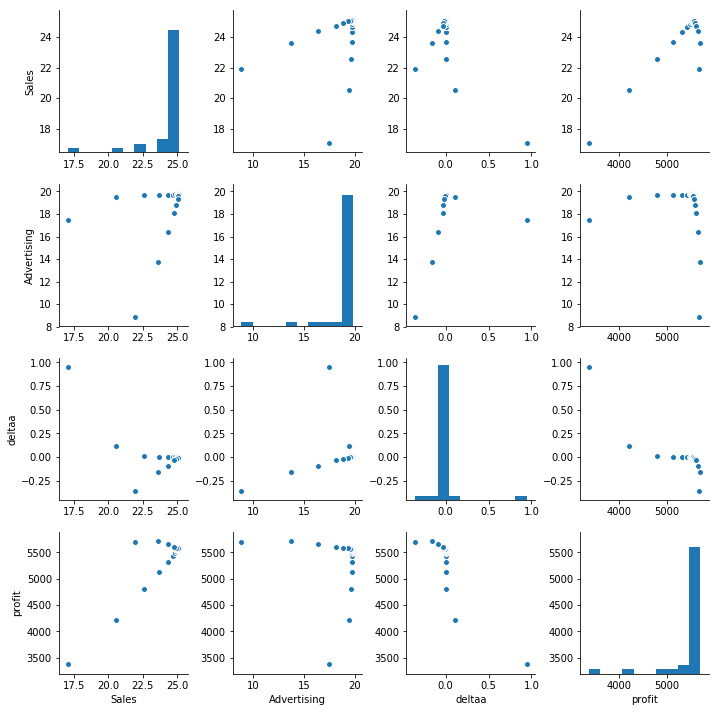

In [102]:
sns.pairplot(continous)

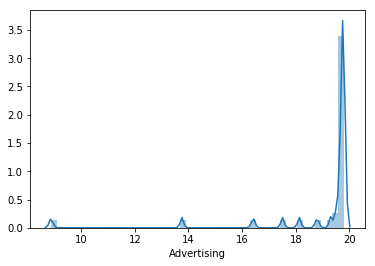

In [103]:
sns.distplot(continous['Advertising'])

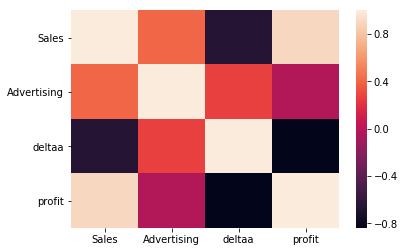

In [104]:
sns.heatmap(continous.corr())

In [105]:
X = continous.drop('Advertising', axis=1)
y = continous['Advertising']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=101)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lm = LinearRegression()

In [110]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
print(lm.intercept_)

3.38996386517e-10


In [112]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Sales,3.000000e+00
deltaa,7.515567e-11
profit,-1.000000e-02


In [113]:
predictions = lm.predict(X_test)

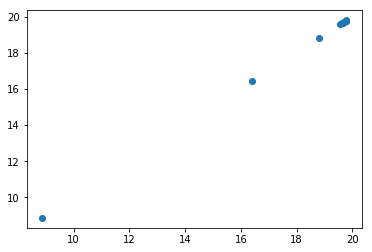

In [114]:
plt.scatter(y_test,predictions)

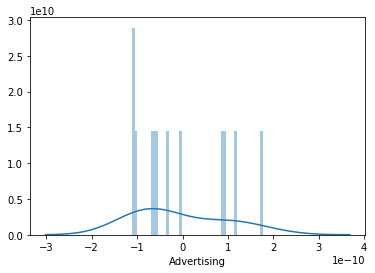

In [115]:
sns.distplot((y_test-predictions),bins=50);

In [116]:
from sklearn import metrics

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 8.4649324586886606e-11)
('MSE:', 8.9983434830383447e-21)
('RMSE:', 9.4859598792311702e-11)
